## Dog Breed Classification

In this project we will use traditional CNN, CNN with data augmentation and finally transfer Learning by VGG16 model with weights pre-trained on Imagenet to solve the dog breed classification problem

### Load Dataset Files

In [0]:
from google.colab import drive

In [0]:
import pandas as pd


In [0]:
%tensorflow_version 2.x

In [2]:
rive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Now, upload the given dataset file shared with you in your google drive and give its path for the below given `project_path` variable. For example, a path is given below according to the file path in our google drive. You need to change this to match the path of yours.

In [0]:
project_path = "/content/drive/My Drive/DogBreed_Classification/"

Run the below code to extract all the images in the train.zip files given in the dataset. We are going to use these images as train and validation sets and their labels in further steps.

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'train.zip', 'r') as z:
  z.extractall()

Repeat the same step for test.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'test.zip', 'r') as z:
  z.extractall()

Repeat the same step for sample_submission.csv.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'sample_submission.csv.zip', 'r') as z:
  z.extractall()

Repeat the same step for labels.csv.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'labels.csv.zip', 'r') as z:
  z.extractall()

After this process, we will have 4 files - Train folder, test folder and labels.csv and sample_submission.csv as part of your google drive

### Read labels.csv file using pandas

In [11]:
labels = pd.read_csv('./labels.csv')
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


### Print the count of each category of Dogs given in the dataset



In [12]:
labels['breed'].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
komondor                 67
brabancon_griffon        67
golden_retriever         67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


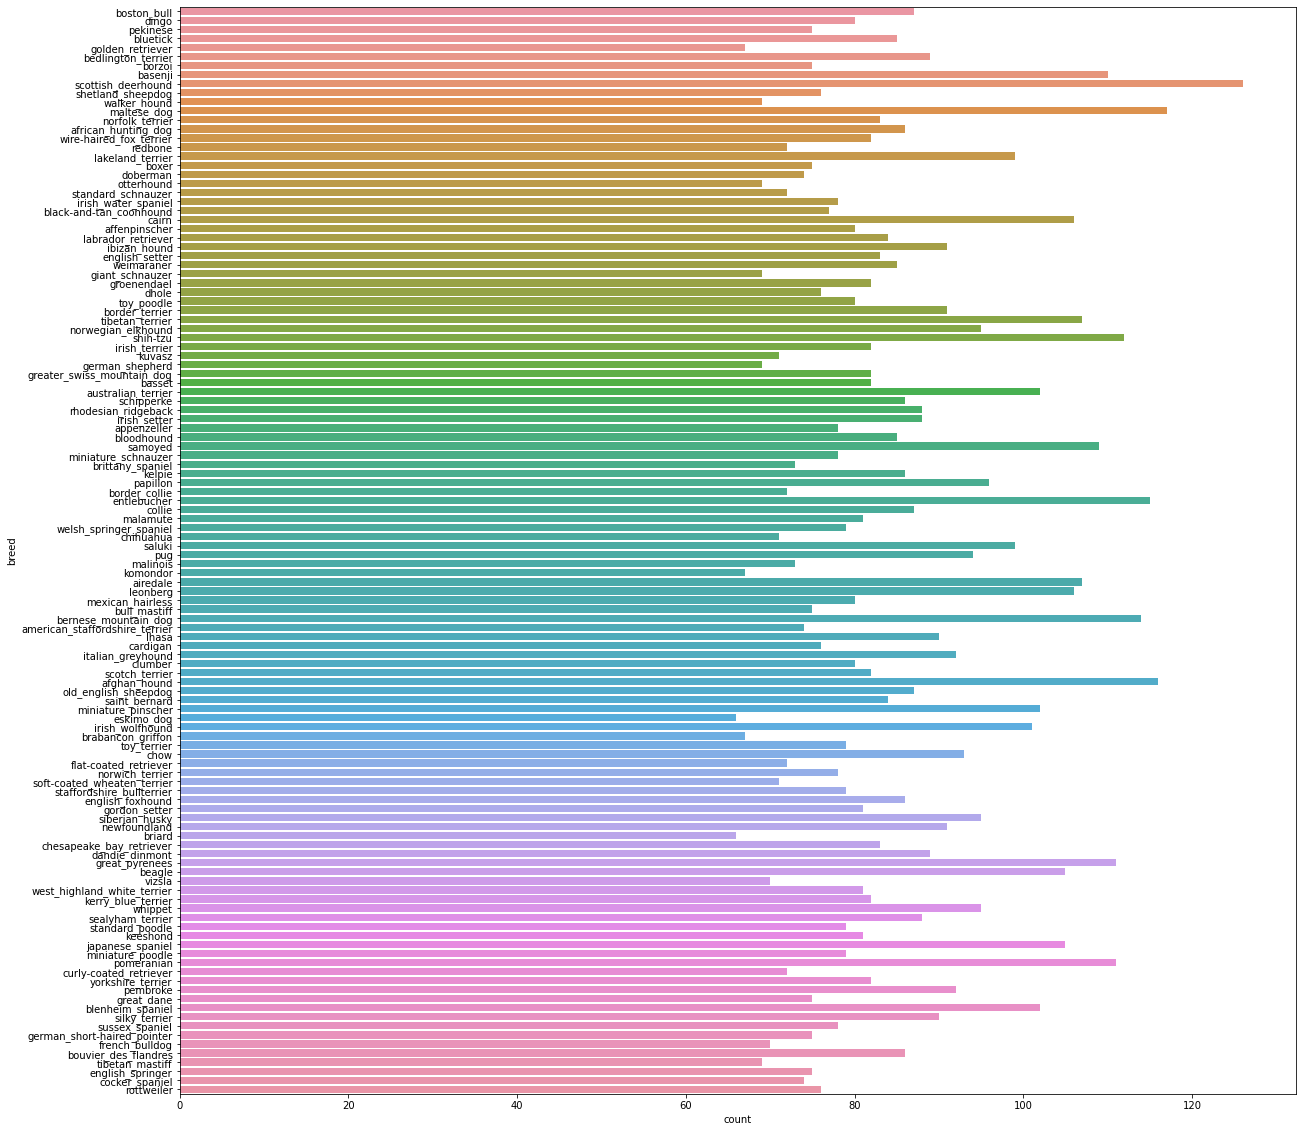

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.countplot(y=labels['breed'])

### Get one-hot encodings of labels

In [0]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [0]:
encode = LabelEncoder()
len = encode.fit_transform(labels['breed'])
y = to_categorical(len,num_classes=labels['breed'].nunique())

## Preparing training dataset
1. Write a code which reads each and every id from labels.csv file and loads the corresponding image (in RGB - 128, 128, 3) from the train folder. <br>
2. Create 2 variables <br> 
     a.  x_train - Should have all the images of the dogs from train folder <br>
     b.  y_train - Corresponding label of the dog <br>
<u>Note:</u> The id of the dog images and its corresponding labels are available in labels.csv file   
<u>Hint:</u> Watch the video shared on "Preparing the training dataset" if you face issue on creating the training dataset

In [0]:
import cv2

In [0]:
x_train = []
label = []

for img,breeds in labels.values:
  train_feat = cv2.imread('./train/{}.jpg'.format(img),1)
  train_feat_resz = cv2.resize(train_feat,(128,128))
  x_train.append(train_feat_resz)
  label.append(breeds)

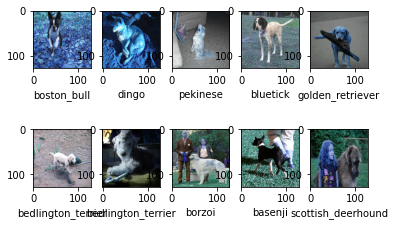

In [47]:
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(x_train[i])
  plt.xlabel(label[i])
  i += 1

Normalize the training data and convert into 4 dimensions so that it can be used as an input to conv layers in the model

In [0]:
import numpy as np
x_train = np.array(x_train).astype('float32')

In [0]:
x_train_no = x_train/255

In [50]:
print("The shape of X_train is ==>",x_train_no[0].shape)

The shape of X_train is ==> (128, 128, 3)


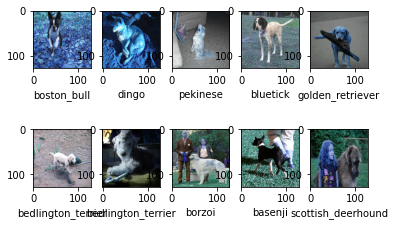

In [51]:
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(x_train_no[i])
  plt.xlabel(label[i])
  i += 1

### Split the training and validation data from `x_train_data` and `y_train_data` obtained from above step

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train,x_val,y_train,y_val = train_test_split(x_train_no,y,test_size=0.3)

### Loading the test data
Read the id column from the samples_submission.csv and store it in test_img

In [54]:
samples = pd.read_csv('./sample_submission.csv')
samples.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333

In [0]:
test_img = samples.id

In [56]:
test_img.values

array(['000621fb3cbb32d8935728e48679680e',
       '00102ee9d8eb90812350685311fe5890',
       '0012a730dfa437f5f3613fb75efcd4ce', ...,
       'fff74b59b758bbbf13a5793182a9bbe4',
       'fff7d50d848e8014ac1e9172dc6762a3',
       'fffbff22c1f51e3dc80c4bf04089545b'], dtype=object)

Run the below code to load the test image files in x_test_feature

In [57]:
img_rows = 120
img_cols = 120
from tqdm import tqdm
x_test_feat = []
i = 0 # initialisation
for f in tqdm(test_img.values): # f for format ,jpg
    img = cv2.imread('./test/{}.jpg'.format(f), 1)
    img_resize = cv2.resize(img, (img_rows, img_cols)) 
    x_test_feature.append(img_resize)

100%|██████████| 10357/10357 [00:26<00:00, 390.71it/s]


Normalize the test data and convert it into 4 dimensions

In [0]:
x_test = np.array(x_test_feature)

In [0]:
x_test_no = x_test/255

In [60]:
x_test_no.shape

(20714,)

### Build a basic conv neural network with 2 conv layers (kernel sizes - 5 and 3) add layers as mentioned below for classification.

1. Add a Dense layer with 256 neurons with `relu` activation

2. Add a Dense layer with 120 neurons as final layer (as there are 120 classes in the given dataset) with `softmax` activation for classifiaction. 

In [0]:
from tensorflow.keras.layers import MaxPool2D,Dropout,Dense,Conv2D,BatchNormalization,Flatten
from tensorflow.keras.models import Sequential

In [0]:
model = Sequential()
model.add(Conv2D(40,kernel_size=5,activation='relu',input_shape=(128,128,3)))
model.add(MaxPool2D(pool_size=2))
model.add(Conv2D(84,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(120,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [63]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 124, 124, 40)      3040      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 40)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 84)        30324     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 84)        0         
_________________________________________________________________
flatten (Flatten)            (None, 75600)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               19353856  
_________________________________________________________________
dropout (Dropout)            (None, 256)               0

### Use batch_size = 128 and epochs = 10 and execute the model

In [0]:
from tensorflow.keras.callbacks import EarlyStopping
fastop=EarlyStopping(monitor='val_loss', patience=3)

In [70]:
history = model.fit(x_train,y_train,validation_data = (x_val,y_val),epochs = 10,batch_size = 128,callbacks=[fastop])

Epoch 1/10
56/56 [==============================] - 3s 60ms/step - loss: 0.3720 - accuracy: 0.9062 - val_loss: 8.2495 - val_accuracy: 0.0381
Epoch 2/10
56/56 [==============================] - 3s 60ms/step - loss: 0.2086 - accuracy: 0.9514 - val_loss: 8.8163 - val_accuracy: 0.0411
Epoch 3/10
56/56 [==============================] - 3s 60ms/step - loss: 0.1539 - accuracy: 0.9644 - val_loss: 9.4436 - val_accuracy: 0.0388
Epoch 4/10
56/56 [==============================] - 3s 61ms/step - loss: 0.1300 - accuracy: 0.9705 - val_loss: 9.3451 - val_accuracy: 0.0398


In [71]:
loss,accuracy = model.evaluate(x_train,y_train)
loss1,accuracy1 = model.evaluate(x_val,y_val)
print("The training loss was about {}% wherein the training accuracy accounted up to {}% but,\n the validation loss goes upto {}% & validation accuracy is {}%".format(loss*100,accuracy*100,loss1*100,accuracy1*100))

96/96 [==============================] - 1s 7ms/step - loss: 9.3448 - accuracy: 0.0398
The training loss was about 1.9789321348071098% wherein the training accuracy accounted up to 99.90216493606567% but,
 the validation loss goes upto 934.4755172729492% & validation accuracy is 3.977828472852707%


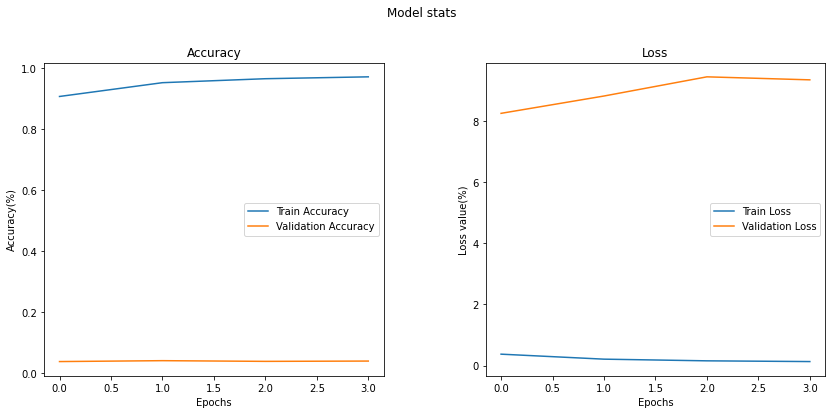

In [76]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,6))
fig.suptitle("Model stats")
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1.plot(history.history['accuracy'],label='Train Accuracy')
ax1.plot(history.history['val_accuracy'],label='Validation Accuracy')
ax1.set_title('Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy(%)')
ax1.legend(loc='best')

ax2.plot(history.history['loss'],label='Train Loss')
ax2.plot(history.history['val_loss'],label='Validation Loss')
ax2.set_title('Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss value(%)')
ax2.legend(loc='best')

In [0]:
model1 = Sequential()
model1.add(Conv2D(10,kernel_size=5,activation='relu',input_shape=(128,128,3)))
model1.add(Conv2D(30,kernel_size=3,activation='relu'))
model1.add(MaxPool2D(pool_size=2))
model1.add(BatchNormalization())
model1.add(Conv2D(60,kernel_size=3,activation='relu'))
model1.add(Conv2D(90,kernel_size=3,activation='relu'))
model1.add(MaxPool2D(pool_size=3))
model1.add(Conv2D(120,kernel_size=3,activation='relu'))
model1.add(Conv2D(150,kernel_size=3,activation='relu'))
model1.add(MaxPool2D(pool_size=2))
model1.add(Flatten())
model1.add(BatchNormalization())
model1.add(Dense(512,activation='relu'))
model1.add(Dropout(rate=0.25))
model1.add(Dense(256,activation='relu'))
model1.add(Dense(120,activation='softmax'))
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [79]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 124, 124, 10)      760       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 122, 122, 30)      2730      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 61, 61, 30)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 61, 61, 30)        120       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 59, 59, 60)        16260     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 57, 57, 90)        48690     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 19, 19, 90)       

Epoch 1/50
56/56 [==============================] - 5s 81ms/step - loss: 0.3419 - accuracy: 0.9187 - val_loss: 6.4190 - val_accuracy: 0.0783
Epoch 2/50
56/56 [==============================] - 5s 81ms/step - loss: 0.2662 - accuracy: 0.9410 - val_loss: 6.5268 - val_accuracy: 0.0734
Epoch 3/50
56/56 [==============================] - 5s 81ms/step - loss: 0.2346 - accuracy: 0.9452 - val_loss: 6.8649 - val_accuracy: 0.0773
Epoch 4/50
56/56 [==============================] - 5s 81ms/step - loss: 0.1949 - accuracy: 0.9561 - val_loss: 7.5701 - val_accuracy: 0.0812
Epoch 5/50
56/56 [==============================] - 5s 81ms/step - loss: 0.1424 - accuracy: 0.9695 - val_loss: 6.8529 - val_accuracy: 0.0783
Epoch 6/50
56/56 [==============================] - 5s 81ms/step - loss: 0.1160 - accuracy: 0.9760 - val_loss: 7.2628 - val_accuracy: 0.0815
Epoch 7/50
56/56 [==============================] - 5s 81ms/step - loss: 0.1206 - accuracy: 0.9733 - val_loss: 7.2031 - val_accuracy: 0.0818
Epoch 8/50
56

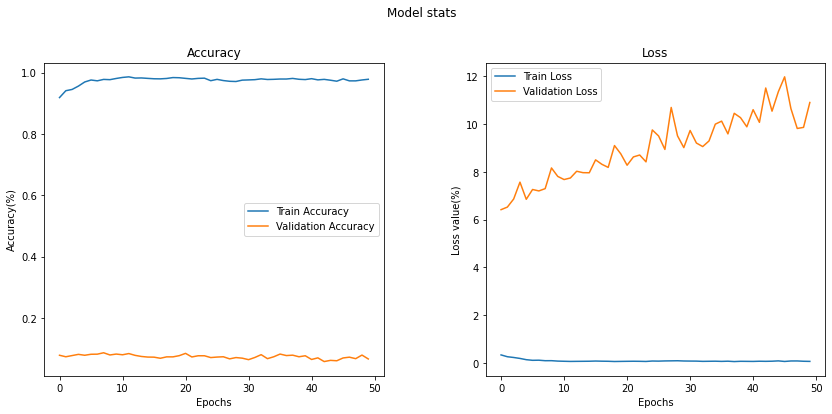

In [81]:
history = model1.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=50,batch_size=128)
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,6))
fig.suptitle("Model stats")
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1.plot(history.history['accuracy'],label='Train Accuracy')
ax1.plot(history.history['val_accuracy'],label='Validation Accuracy')
ax1.set_title('Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy(%)')
ax1.legend(loc='best')

ax2.plot(history.history['loss'],label='Train Loss')
ax2.plot(history.history['val_loss'],label='Validation Loss')
ax2.set_title('Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss value(%)')
ax2.legend(loc='best')

#The model accuracy is very poor !!!!

### Use Data Augmentation in the above model to see if the accuracy improves


In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
train_datagen = ImageDataGenerator(rotation_range=45,horizontal_flip=True,width_shift_range=0.2,height_shift_range=0.2,rescale = 1./255,shear_range=0.2,zoom_range=0.2,fill_mode='nearest')

In [0]:
val_datagenn = ImageDataGenerator(rescale=1./255)

### Using the above objects, create the image generators with variable names `train_generator` and `val_generator`

You need to use train_datagen.flow() and val_datagen.flow()

In [0]:
train_generator = train_datagen.flow(x_train,y_train,batch_size=100,shuffle=False)

In [0]:
val_generator = val_datagenn.flow(x_val,y_val,batch_size=100,shuffle=False)

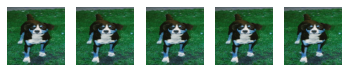

In [93]:
from matplotlib import pyplot as plt
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    gene=val_datagenn.random_transform(x_val[1])
    plt.imshow(gene)
    plt.plot()
plt.show()

### Fit the model using fit_generator() using `train_generator` and `val_generator` from the above step with 10 epochs

In [94]:
model1.fit(train_generator,validation_data=val_generator,epochs=10)

Epoch 1/10
    222/Unknown - 69s 312ms/step - loss: 4.6764 - accuracy: 0.0189

KeyboardInterrupt: ignored

#i stoped this step because it take too much to run again

In [0]:
loss1,acc1 = model.evaluate(train_generator)
loss2,acc2 = model.evaluate(val_generator)
print("The training loss was about {}% wherein the training accuracy accounted up to {}% but,\n the validation loss goes upto {}% & validation accuracy is {}%".format(loss1*100,acc1*100,loss2*100,acc2*100))

   2320/Unknown - 712s 307ms/step - loss: 6.6637 - accuracy: 0.0075

# Model accuracy is still poor !!

### Lets use Transfer Learning

Download the vgg wieght file from here : https://github.com/MinerKasch/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

Use the below code to load VGG16 weights trained on ImageNet

In [0]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
# Instantiate the model with the pre-trained weights (no top)
base_model= VGG16(weights=('/content/drive/My Drive/AI/Project/6th/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'),
                 include_top=False, pooling='avg')

Print the summary of the base_model

In [0]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

### Add the following classification layers to the imported VGG Model <br>
1. Flatten Layer
2. Dense layer with 1024 neurons with activation as Relu
3. Dense layer with 256 neurons with activation as Relu
4. Dense layer with 120 neurons with activation as Softmax

In [0]:
new_model = Sequential()
new_model.add(base_model)
new_model.add(Flatten())
new_model.add(Dense(1024,activation='relu'))
new_model.add(Dropout(rate=0.25))
new_model.add(Dense(256,activation='relu'))
new_model.add(Dropout(rate=0.25))
new_model.add(Dense(120,activation='softmax'))

In [0]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 512)               14714688  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 1024)              525312    
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               262400    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 120)               3

### Make all the layers in the base_model (VGG16) to be non-trainable

In [0]:
for layer in base_model.layers:
  layer.trainable = False

In [0]:
for layer in base_model.layers:
  print(layer.name,layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False
global_average_pooling2d False


### Fit and compile the model with batch_size = 128 and epochs = 10 and execute the model

Try to get training and validation accuracy to be more than 90%

In [0]:
new_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
new_history = new_model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=10,batch_size=128)

Train on 8177 samples, validate on 2045 samples
Epoch 1/10
8177/8177 [==============================] - 11s 1ms/sample - loss: 4.7768 - accuracy: 0.0168 - val_loss: 4.7053 - val_accuracy: 0.0416
Epoch 2/10
8177/8177 [==============================] - 8s 937us/sample - loss: 4.5396 - accuracy: 0.0412 - val_loss: 4.3068 - val_accuracy: 0.0694
Epoch 3/10
8177/8177 [==============================] - 8s 941us/sample - loss: 4.1437 - accuracy: 0.0794 - val_loss: 3.9112 - val_accuracy: 0.1066
Epoch 4/10
8177/8177 [==============================] - 8s 943us/sample - loss: 3.8105 - accuracy: 0.1202 - val_loss: 3.6724 - val_accuracy: 0.1222
Epoch 5/10
8177/8177 [==============================] - 8s 940us/sample - loss: 3.5824 - accuracy: 0.1480 - val_loss: 3.4928 - val_accuracy: 0.1804
Epoch 6/10
8177/8177 [==============================] - 8s 939us/sample - loss: 3.4049 - accuracy: 0.1801 - val_loss: 3.3678 - val_accuracy: 0.1765
Epoch 7/10
8177/8177 [==============================] - 8s 941us/

In [0]:
new_history1 = new_model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=20,batch_size=128,callbacks=[fastop])

Train on 8177 samples, validate on 2045 samples
Epoch 1/20
8177/8177 [==============================] - 8s 944us/sample - loss: 2.8599 - accuracy: 0.2799 - val_loss: 3.1121 - val_accuracy: 0.2333
Epoch 2/20
8177/8177 [==============================] - 8s 941us/sample - loss: 2.8002 - accuracy: 0.2871 - val_loss: 3.0704 - val_accuracy: 0.2421
Epoch 3/20
8177/8177 [==============================] - 8s 938us/sample - loss: 2.7445 - accuracy: 0.3008 - val_loss: 3.0736 - val_accuracy: 0.2381
Epoch 4/20
8177/8177 [==============================] - 8s 940us/sample - loss: 2.6688 - accuracy: 0.3172 - val_loss: 3.0363 - val_accuracy: 0.2513
Epoch 5/20
8177/8177 [==============================] - 8s 938us/sample - loss: 2.6022 - accuracy: 0.3191 - val_loss: 3.0263 - val_accuracy: 0.2548
Epoch 6/20
8177/8177 [==============================] - 8s 941us/sample - loss: 2.5415 - accuracy: 0.3422 - val_loss: 3.0419 - val_accuracy: 0.2538
Epoch 7/20
8177/8177 [==============================] - 8s 940us

In [0]:
import cv2
import numpy as np

x_train1 = []
label = []

for img,breeds in labels.values:
  train_feat1 = cv2.imread('./train/{}.jpg'.format(img),1)
  train_feat_resz1 = cv2.resize(train_feat1,(224,224))
  x_train1.append(train_feat_resz1)
  label.append(breeds)

In [0]:
import numpy as np
x_train1 = np.array(x_train1)

In [0]:
x_train_pre = preprocess_input(x_train1)

In [0]:
from sklearn.model_selection import train_test_split
x_train1,x_val1,y_train1,y_val1 = train_test_split(x_train_pre,ohe,test_size=0.25)

In [0]:
print("the shape of x_train1 is == >",x_train1.shape)
print("the shape of x_val1 is == >",x_val1.shape)
print("the shape of y_train1 is == >",y_train1.shape)
print("the shape of y_val1 is == >",y_val1.shape)

the shape of x_train1 is == > (7666, 224, 224, 3)
the shape of x_val1 is == > (2556, 224, 224, 3)
the shape of y_train1 is == > (7666, 120)
the shape of y_val1 is == > (2556, 120)


In [0]:
train_generator1 = train_datagen.flow(x_train1,y_train1,batch_size=64)
val_generator1 = val_datagenn.flow(x_val1,y_val1,batch_size=64)

In [0]:
an_model = Sequential()
an_model.add(base_model)
an_model.add(Flatten())
an_model.add(BatchNormalization())
an_model.add(Dense(1000,activation='relu',input_dim=512))
an_model.add(Dropout(rate=0.3))
an_model.add(Dense(800,activation='relu'))
an_model.add(Dropout(rate=0.25))
an_model.add(Dense(500,activation='relu'))
an_model.add(BatchNormalization())
an_model.add(Dense(300,activation='relu'))
an_model.add(Dropout(rate=0.25))
an_model.add(Dense(120,activation='softmax'))
an_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
an_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 512)               14714688  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dense (Dense)                (None, 1000)              513000    
_________________________________________________________________
dropout (Dropout)            (None, 1000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 800)               800800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 800)               0

In [0]:
for layer in base_model.layers:
  layer.trainable = False

In [0]:
for layer in base_model.layers:
  print(layer.name,layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False
global_average_pooling2d False


  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 120 steps, validate for 40 steps
Epoch 1/40
120/120 [==============================] - 219s 2s/step - loss: 4.4126 - accuracy: 0.0354 - val_loss: 4.7817 - val_accuracy: 0.0211
Epoch 2/40
120/120 [==============================] - 220s 2s/step - loss: 4.3669 - accuracy: 0.0364 - val_loss: 4.6149 - val_accuracy: 0.0282
Epoch 3/40
120/120 [==============================] - 220s 2s/step - loss: 4.3364 - accuracy: 0.0380 - val_loss: 5.1184 - val_accuracy: 0.0274
Epoch 4/40
120/120 [==============================] - 220s 2s/step - loss: 4.3191 - accuracy: 0.0414 - val_loss: 4.4174 - val_accuracy: 0.0403
Epoch 5/40
120/120 [==============================] - 220s 2s/step - loss: 4.3088 - accuracy: 0.0407 - val_loss: 4.3961 - val_accuracy: 0.0286
Epoch 6/40
120/120 [==============================] - 220s 2s/step - loss: 4.2680 - accuracy: 0.0454 - val_loss: 4.5370 - val_accuracy: 0.0305
Epoch 7/40
120/120 [=============================

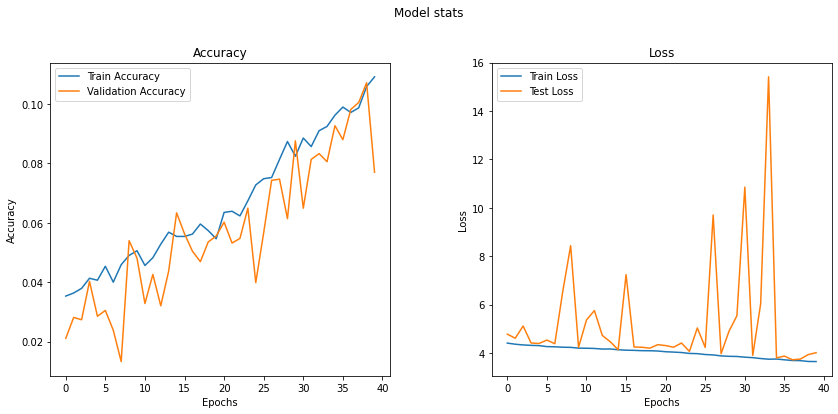

In [0]:
new_hist = an_model.fit(train_generator1,validation_data=val_generator1,epochs=40,callbacks=[fastop])
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,6))
fig.suptitle("Model stats")
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1.plot(new_hist.history['accuracy'],label='Train Accuracy')
ax1.plot(new_hist.history['val_accuracy'],label='Validation Accuracy')
ax1.set_title('Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend(loc='best')

ax2.plot(new_hist.history['loss'],label='Train Loss')
ax2.plot(new_hist.history['val_loss'],label='Test Loss')
ax2.set_title('Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend(loc='best')

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 120 steps, validate for 40 steps
Epoch 1/40
120/120 [==============================] - 219s 2s/step - loss: 3.6187 - accuracy: 0.1105 - val_loss: 3.7401 - val_accuracy: 0.1080
Epoch 2/40
120/120 [==============================] - 220s 2s/step - loss: 3.6098 - accuracy: 0.1089 - val_loss: 4.7323 - val_accuracy: 0.0849
Epoch 3/40
120/120 [==============================] - 220s 2s/step - loss: 3.5741 - accuracy: 0.1179 - val_loss: 5.1568 - val_accuracy: 0.1068
Epoch 4/40
120/120 [==============================] - 220s 2s/step - loss: 3.5924 - accuracy: 0.1141 - val_loss: 3.6632 - val_accuracy: 0.1072
Epoch 5/40
120/120 [==============================] - 220s 2s/step - loss: 3.5484 - accuracy: 0.1227 - val_loss: 6.9060 - val_accuracy: 0.1135
Epoch 6/40
120/120 [==============================] - 220s 2s/step - loss: 3.5468 - accuracy: 0.1158 - val_loss: 3.6441 - val_accuracy: 0.1095
Epoch 7/40
120/120 [=============================

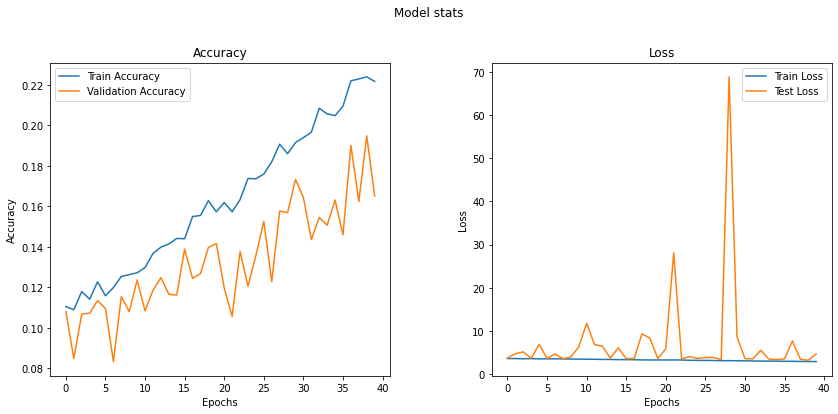

In [0]:
new_hist = an_model.fit(train_generator1,validation_data=val_generator1,epochs=40,callbacks=[fastop])
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,6))
fig.suptitle("Model stats")
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1.plot(new_hist.history['accuracy'],label='Train Accuracy')
ax1.plot(new_hist.history['val_accuracy'],label='Validation Accuracy')
ax1.set_title('Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend(loc='best')

ax2.plot(new_hist.history['loss'],label='Train Loss')
ax2.plot(new_hist.history['val_loss'],label='Test Loss')
ax2.set_title('Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend(loc='best')

In [0]:
new_hist = an_model.fit(train_generator1,validation_data=val_generator1,epochs=500)
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,6))
fig.suptitle("Model stats")
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1.plot(new_hist.history['accuracy'],label='Train Accuracy')
ax1.plot(new_hist.history['val_accuracy'],label='Validation Accuracy')
ax1.set_title('Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy(%)')
ax1.legend(loc='best')

ax2.plot(new_hist.history['loss'],label='Train Loss')
ax2.plot(new_hist.history['val_loss'],label='Test Loss')
ax2.set_title('Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss(%)')
ax2.legend(loc='best')

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 120 steps, validate for 40 steps
Epoch 1/500
120/120 [==============================] - 78s 654ms/step - loss: 4.5118 - accuracy: 0.0310 - val_loss: 4.5561 - val_accuracy: 0.0250
Epoch 2/500
120/120 [==============================] - 78s 652ms/step - loss: 4.5068 - accuracy: 0.0307 - val_loss: 5.1177 - val_accuracy: 0.0106
Epoch 3/500
120/120 [==============================] - 79s 655ms/step - loss: 4.5083 - accuracy: 0.0291 - val_loss: 5.8902 - val_accuracy: 0.0098
Epoch 4/500
120/120 [==============================] - 77s 642ms/step - loss: 4.5032 - accuracy: 0.0324 - val_loss: 4.5692 - val_accuracy: 0.0286
Epoch 5/500
120/120 [==============================] - 77s 644ms/step - loss: 4.4950 - accuracy: 0.0309 - val_loss: 4.6339 - val_accuracy: 0.0227
Epoch 6/500
120/120 [==============================] - 78s 647ms/step - loss: 4.4878 - accuracy: 0.0314 - val_loss: 7.2166 - val_accuracy: 0.0090
Epoch 7/500
120/120 [==========